# Keras Module API

# 課程目標:
    
    了解Keras 函數式 API 的使用
    

# 範例重點: 
    了解函數式 API 的彈性

In [1]:
import keras
from keras.layers import Input, Embedding, LSTM, Dense
from keras.models import Model
import tensorflow as tf
import sys

print(f"Python: {sys.version}")
print(f"Keras: {keras.__version__}")
print(f"Tensorflow: {tf.__version__}")

Using TensorFlow backend.


Python: 3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]
Keras: 2.2.4
Tensorflow: 1.14.0


In [2]:
#主要輸入接收新聞標題本身，即一個整數序列（每個整數編碼一個詞）。
#這些整數在1 到10,000 之間（10,000 個詞的詞彙表），且序列長度為100 個詞
#宣告一個 NAME 去定義Input
main_input = Input(shape=(100,), dtype='int32', name='main_input')


# Embedding 層將輸入序列編碼為一個稠密向量的序列，
# 每個向量維度為 512。
x = Embedding(output_dim=512, input_dim=10000, input_length=100)(main_input)

# LSTM 層把向量序列轉換成單個向量，
# 它包含整個序列的上下文信息
lstm_out = LSTM(32)(x)

In [3]:
#插入輔助損失，使得即使在模型主損失很高的情況下，LSTM 層和 Embedding 層都能被平穩地訓練
aux_output = Dense(1, activation='sigmoid', name='aux_out')(lstm_out)

In [4]:
#輔助輸入數據與LSTM 層的輸出連接起來，輸入到模型
aux_input = Input(shape=(5,), name='aux_in')
x = keras.layers.concatenate([lstm_out, aux_input])


# 堆疊多個全連接網路層

for idx, units in enumerate((128, 128, 64), 1):
    x = Dense(units, activation='relu', name=f'D{idx}')(x)
    
# 最後添加主要的邏輯回歸層
main_output = Dense(1, activation='sigmoid', name='main_output')(x)

In [5]:
# 宣告 MODEL API, 分別採用自行定義的 Input/Output Layer
model = Model(inputs=[main_input, aux_input], outputs=[main_output, aux_output])

In [6]:
model.compile(optimizer='rmsprop',
              loss={'main_output': 'binary_crossentropy', 'aux_out': 'binary_crossentropy'},
              loss_weights={'main_output': 1., 'aux_out': 0.2})



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [7]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
main_input (InputLayer)         (None, 100)          0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 100, 512)     5120000     main_input[0][0]                 
__________________________________________________________________________________________________
lstm_1 (LSTM)                   (None, 32)           69760       embedding_1[0][0]                
__________________________________________________________________________________________________
aux_in (InputLayer)             (None, 5)            0                                            
__________________________________________________________________________________________________
concatenat

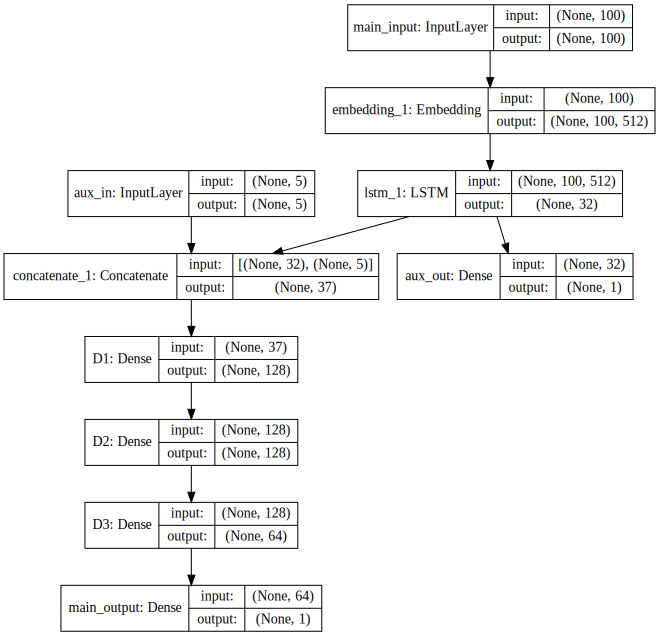

In [8]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))